In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('train.csv')
pred = pd.read_csv('test.csv')
passengerId = np.array(pred['PassengerId'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking if values are nan in any column of the dataset
print(dataset.isnull().sum())#total number of nan values in column
print("    ")
print(pred.isnull().sum())
# there are a lot of missing values in cabin this column so we are going to drop this column for creating the model

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
    
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
# droppimg the columns which i thought would be of no use or having a large number of nan values
dataset = dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(dataset.head())
pred = pred.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(pred.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [5]:
# we can't drop age column so we filled it with mean value otherwise dropping rows corresponding to nan values would result in loss of a lot of data
# for training set
mean_value = dataset['Age'].mean()
dataset['Age'].fillna(value=mean_value,inplace=True)
# for prediction set
mean_value = pred['Age'].mean()
pred['Age'].fillna(value=mean_value,inplace=True)

In [6]:
# filling one nan value with the mean in the pred set
mean_value = pred['Fare'].mean()
pred['Fare'].fillna(value=mean_value,inplace=True)

In [7]:
# checking for nan values again
print(dataset.isnull().sum())
print("       ")
print(pred.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
       
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
# we can drop 2 rows as they are having nan values in embarked column 
dataset = dataset.dropna(axis=0)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [9]:
# separating y_train from the dataset as it is not having the categorical variables
data_X = dataset.iloc[:,1:]
data_Y= np.array(dataset['Survived'])
data_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_train = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,-1])], remainder='passthrough')
data_X = np.array(ct_train.fit_transform(data_X))
ct_pred = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,-1])], remainder='passthrough')
pred = np.array(ct_pred.fit_transform(pred))

In [11]:
data_X = pd.DataFrame(data_X)
print(data_X.head(),"     ")
pred = pd.DataFrame(pred)
print(pred.head())

     0    1    2    3    4    5    6    7     8    9   10       11
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  22.0  1.0  0.0   7.2500
1  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  38.0  1.0  0.0  71.2833
2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  26.0  0.0  0.0   7.9250
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  35.0  1.0  0.0  53.1000
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  35.0  0.0  0.0   8.0500      
     0    1    2    3    4    5    6    7     8    9   10       11
0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  34.5  0.0  0.0   7.8292
1  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  47.0  1.0  0.0   7.0000
2  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  62.0  0.0  0.0   9.6875
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  27.0  0.0  0.0   8.6625
4  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  22.0  1.0  1.0  12.2875


In [12]:
data_X = np.array(data_X)
pred = np.array(pred)

### *Now i am gonna reduce the number of features by PCA*
- First we have to normalize the data.
- Then we have find the covariance matrix of shape (num_features, num_features).
- Then we have find the eigenvectors of the matrix.
- Then we have to sort them to and find the k eigenvectors(k being the output dimension) with the largest eignvalues.
- Then we have to simply stack the above found k eigenvectors and in the shape (num_features, k) and the multiply this      matrix with the data matrix.
- Then we will simply plot the data points to check how a classifier to the dataset is gonna look.

In [13]:
mu = np.mean(data_X, axis=0)

In [14]:
def get_tranformation_matrix_PCA(data, mu, sigma, k = 2):
    data_X = data
    data_X = (data_X-mu)/sigma
    #######
    cov_matrix = np.cov(data_X, rowvar=False)
    ##########
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    #########
    sorted_indices = np.argsort(eigen_values)
    sorted_indices = sorted_indices[::-1]
    sorted_eigen_values = eigen_values[sorted_indices]
    sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
    ########
    transform_matrix = []
    for i in range(k):
        transform_matrix.append(sorted_eigen_vectors[:,i])
    transform_matrix = np.array(transform_matrix)
    transform_matrix = transform_matrix.T
    ######
    return transform_matrix

In [18]:
transform_matrix = get_tranformation_matrix_PCA(data_X, mu, sigma, k=2)
train_X = data_X@transform_matrix
train_X.shape

(889, 2)

In [46]:
def visualize(data_X, data_Y, num_classes=2):
    colors = ['r', 'b'] # for 2 differnet classes
    data = []
    for i in range(num_classes):
        data.append(data_X[data_Y==i])
    print(data[0].shape)
    for i in range(len(colors)):
        plt.scatter(data[i][:,0], data[i][:, 1], c =colors[i])
    plt.show()

(549, 2)


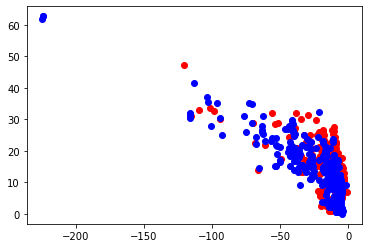

In [47]:
visualize(train_X, data_Y, 2)

In [13]:
def collect_samples(data_X, data_Y, start_index=0, num_examples=300):
    train_X = []
    train_Y = []
    for cat in range(2):
        num_samples =0
        for idx in range(start_index, data_X.shape[0]):
            if num_samples==num_examples:
                break
            if data_Y[idx]==cat:
                train_X.append(data_X[idx])
                train_Y.append(cat)
                num_samples+=1
    return np.array(train_X), np.array(train_Y)

In [49]:
#ok so samples have been collected, now we will define the functions required for KNN algo to work
# KNN algorithm isn't even an optimization algorithm, it is just a similarity measure
# and we will use the cosine similarity measure in this
def cosine_similarity(a, b):
    return a@b/(np.sqrt(a@a)*np.sqrt(b@b))

In [50]:
def KNN_estimate(train_X, train_Y, v, k=5):
    # 5 most similar vectors to v in X
    # X is a matrix of shape (m, n_dim)
    similar = []
    for i in range(train_X.shape[0]):
        similar.append(cosine_similarity(train_X[i], v))
    #########
    # now similarities are calculated and we have to find maximum similar elements
    similar = np.array(similar)
    indices = np.argsort(similar)
    indices = indices[::-1]
    ans = np.zeros(k)
    for i in range(k):
        ans[i] = train_Y[indices[i]]
    return ans.astype('int')

In [51]:
def class_estimate(pred_vector, num_cat=2):
    a = np.zeros(num_cat)
    for i in range(pred_vector.shape[0]):
        a[pred_vector[i]]+=1
    return np.argmax(a)

In [65]:
def accuracy(train_X, train_Y, test_X, test_Y):
    ans = np.zeros(test_Y.shape[0])
    for i in range(test_X.shape[0]):
        num_ones = 0
        num_zeros = 0
        for k in range(3,6):
            if class_estimate(KNN_estimate(train_X, train_Y, test_X[i], k=k), num_cat=2)==0:
                num_zeros+=1
            else:
                num_ones+=1
        if num_ones>=num_zeros:
            ans[i] = 1
        else:
            ans[i] = 0
        if (i+1)%100==0:
            print(i+1,' examples are processed')
    return (np.sum(ans==test_Y)/ans.shape[0])*100

In [59]:
train_X, train_Y = collect_samples(data_X, data_Y)
test_X, test_Y = collect_samples(data_X, data_Y, start_index=700, num_examples=30)

In [64]:
# finding the optimum k
# similar to grid search as there is only one parameter to search
print('The accuarcy of the model is ', accuracy(train_X, train_Y, test_X, test_Y))

The accuarcy of the model is  83.33333333333334


In [66]:
def accuracy(train_X, train_Y, pred):
    ans = np.zeros(pred.shape[0])
    for i in range(test_X.shape[0]):
        num_ones = 0
        num_zeros = 0
        for k in range(3,6):
            if class_estimate(KNN_estimate(train_X, train_Y, test_X[i], k=k), num_cat=2)==0:
                num_zeros+=1
            else:
                num_ones+=1
        if num_ones>=num_zeros:
            ans[i] = 1
        else:
            ans[i] = 0
        if (i+1)%100==0:
            print(i+1,' examples are processed')
    return ans

In [67]:
ans = predict(train_X, train_Y, pred)

100  examples are processed
200  examples are processed
300  examples are processed
400  examples are processed


In [68]:
s = ans.shape[0]
passengerId = np.array(passengerId).reshape((s,1))
ans = np.array(ans).reshape((s,1))

# creating the df
submit = np.concatenate((passengerId,ans),axis=1)
submission = pd.DataFrame(submit)
submission.columns = ['PassengerId','Survived']

# getting the csv file
submission.to_csv("submission_knn.csv")